In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df=pd.read_csv('/content/gdrive/MyDrive/eth_ml/ethereum.csv')

In [4]:
df.shape

(6300000, 15)

In [5]:
df.head()

,Coin,Increment,Init_Amount,Init_Percent,Date_Start,Date_End,Buy_Sens,Sell_Sens,Fee,Min_Trans,EMA_Deviation,EMA_Days,Cash,Final_Value,HODL
0,ethereum,1,100000,50,2015-08-07,2016-02-05,3,3,1,1000,3,20,23240.88,164722.86,94725
1,ethereum,1,100000,50,2015-08-07,2016-02-05,3,3,1,1000,3,50,15830.12,157666.73,94725
2,ethereum,1,100000,50,2015-08-07,2016-02-05,3,3,1,1000,3,100,14673.63,148995.24,94725
3,ethereum,1,100000,50,2015-08-07,2016-02-05,3,3,1,1000,5,20,25452.57,160310.23,94725
4,ethereum,1,100000,50,2015-08-07,2016-02-05,3,3,1,1000,5,50,16312.19,155495.40,94725


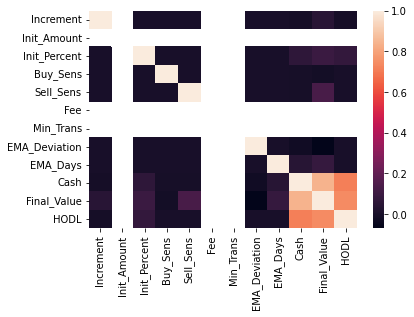

In [6]:
sns.heatmap(df.corr());


In [7]:
features_list=[]
for feature in df.columns:
  uv = df[feature].nunique()
  print(feature, "has ",df[feature].nunique(), "unique values")
  if uv > 1:
    features_list.append(feature)
print(features_list)

Coin has  1 unique values
Increment has  6 unique values
Init_Amount has  1 unique values
Init_Percent has  4 unique values
Date_Start has  27 unique values
Date_End has  27 unique values
Buy_Sens has  10 unique values
Sell_Sens has  10 unique values
Fee has  1 unique values
Min_Trans has  1 unique values
EMA_Deviation has  7 unique values
EMA_Days has  3 unique values
Cash has  3001956 unique values
Final_Value has  3460910 unique values
HODL has  1634 unique values
['Increment', 'Init_Percent', 'Date_Start', 'Date_End', 'Buy_Sens', 'Sell_Sens', 'EMA_Deviation', 'EMA_Days', 'Cash', 'Final_Value', 'HODL']


In [8]:
df_new = df[features_list]

In [10]:
X_features = ['Increment', 'Init_Percent', 'Buy_Sens', 'Sell_Sens', 'EMA_Deviation', 'EMA_Days']
y_target = ['Final_Value']

In [11]:
X = df_new[X_features]
y = df_new[y_target]

In [12]:
# Train test spliting 
from sklearn.model_selection import train_test_split

# Importing the sklearn implementation 
from sklearn.tree import DecisionTreeRegressor

# Precision metrics 
from sklearn.metrics import mean_absolute_error

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Defining the hyper parameters 
hps = {
    'max_depth': 3,
    'min_samples_split': 4
}

# Loading the tree object 
tree = DecisionTreeRegressor(**hps)

# Fitting on the training data 
tree.fit(X_train, y_train)

# Predicting the test set
y_pred = tree.predict(X_test)

# Calculating the mean absolute error 
mae_train = mean_absolute_error(y_train, tree.predict(X_train)).round(2)
mae_test = mean_absolute_error(y_test, y_pred).round(2)

print(f"Mean absolute error on training set: {mae_train}")
print(f"Mean absolute error on test set: {mae_test}")

Mean absolute error on training set: 322021.62
Mean absolute error on test set: 321780.18


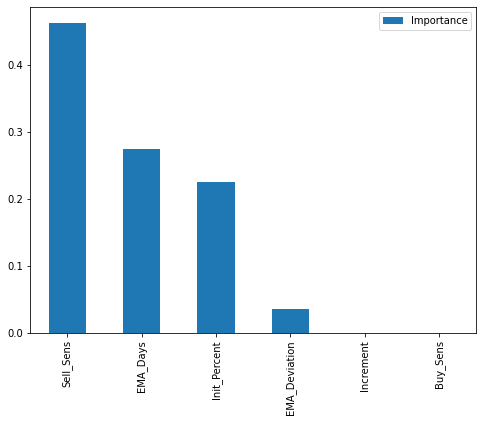

In [15]:
feat_importances = pd.DataFrame(tree.feature_importances_, index=X.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))